# ASHWIN SURESH (21MIS1174)

### Based on the dataset condition and values it is good practice to consider the following model to be Decision Tree Classifier, as all values given are categorical, and a graphical representation will be easier to identify or classify values later... There is no other feature which gives any other implication of any other classification model... There is no specific plotting of this dataset

In [72]:
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

### Load the filepath using pandas library and read_csv command

In [102]:
filepath = 'C:/Users/Administrator/OneDrive/Desktop/SEM-6/SWE4012/Lab Files/monica.csv'

data = pd.read_csv(filepath)

### To view the first 5 existing rows of the dataset

In [84]:
data.head()

,Serial No.,outcome,sex,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke,hosp
0,1,live,f,63,85,n,x,n,y,y,n,n,y
1,2,live,m,59,85,y,x,n,y,n,n,n,y
2,3,live,m,68,85,n,n,n,y,n,n,n,y
3,4,live,m,46,85,n,c,n,n,n,n,n,y
4,5,dead,m,48,85,n,n,y,n,n,y,n,y


### To ensure no null values are present in the existing dataset

In [5]:
data.isnull().sum()

Serial No.    0
outcome       0
sex           0
age           0
yronset       0
premi         0
smstat        0
diabetes      0
highbp        0
hichol        0
angina        0
stroke        0
hosp          0
dtype: int64

In [6]:
data.dtypes

Serial No.     int64
outcome       object
sex           object
age            int64
yronset        int64
premi         object
smstat        object
diabetes      object
highbp        object
hichol        object
angina        object
stroke        object
hosp          object
dtype: object

### First column is not required as we don't need the serial number for computation

In [103]:
data = data.drop(columns = ['Serial No.'], axis = 1)

In [104]:
data.shape

(6367, 12)

In [120]:
data.head(10)

,outcome,sex,premi,smstat,diabetes,highbp,hichol,angina,stroke,hosp
0,1,0,0,2,0,1,1,0,0,1
1,1,1,1,2,0,1,0,0,0,1
2,1,1,0,1,0,1,0,0,0,1
3,1,1,0,0,0,0,0,0,0,1
4,0,1,0,1,1,0,0,1,0,1
5,1,0,0,0,0,1,1,0,0,1
6,1,1,0,2,0,1,0,0,0,1
8,1,1,0,1,0,1,1,0,0,1
9,1,0,0,2,0,1,0,1,0,1
11,1,1,0,1,1,0,0,0,0,1


### Choose in between column as target and concatenate other columns into features

In [120]:
data.head(10)

,outcome,sex,premi,smstat,diabetes,highbp,hichol,angina,stroke,hosp
0,1,0,0,2,0,1,1,0,0,1
1,1,1,1,2,0,1,0,0,0,1
2,1,1,0,1,0,1,0,0,0,1
3,1,1,0,0,0,0,0,0,0,1
4,0,1,0,1,1,0,0,1,0,1
5,1,0,0,0,0,1,1,0,0,1
6,1,1,0,2,0,1,0,0,0,1
8,1,1,0,1,0,1,1,0,0,1
9,1,0,0,2,0,1,0,1,0,1
11,1,1,0,1,1,0,0,0,0,1


In [132]:
X1 = pd.concat([data.iloc[:,:5], data.iloc[:,6:]], axis=1)
Y1 = data['highbp']

In [133]:
X1

,outcome,sex,premi,smstat,diabetes,hichol,angina,stroke,hosp
0,1,0,0,2,0,1,0,0,1
1,1,1,1,2,0,0,0,0,1
2,1,1,0,1,0,0,0,0,1
3,1,1,0,0,0,0,0,0,1
4,0,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
6360,1,0,0,0,0,1,0,0,1
6361,1,1,0,0,0,0,0,0,1
6363,1,1,1,2,0,1,0,0,1
6364,1,1,0,1,0,1,0,0,1


### Remove null values

In [105]:
data.replace('nk', pd.NaT, inplace=True)

In [106]:
data = data.dropna(axis=0)

In [136]:
data.shape

(4889, 10)

### Replacing null values with either mode (if categorical) or median (if numerical)

In [88]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].replace('nk', data[col].mode()[0])
    else:
        data[col] = data[col].replace('nk', data[col].median())

### WE require label encoding as most of the dataset is of the form of categorical, for training the model we require it to be numerical... Also simultaneously we drop columns such as Age and Yronset to further improve the efficiency of our model

In [108]:
from sklearn.preprocessing import LabelEncoder

# Label encoding
le = LabelEncoder()
data['outcome']= le.fit_transform(data['outcome'])
data['sex']= le.fit_transform(data['sex'])
data['premi']= le.fit_transform(data['premi'])
data['smstat']= le.fit_transform(data['smstat'])
data['diabetes']= le.fit_transform(data['diabetes'])
data['highbp']= le.fit_transform(data['highbp'])
data['hichol']= le.fit_transform(data['hichol'])
data['angina']= le.fit_transform(data['angina'])
data['stroke']= le.fit_transform(data['stroke'])
data['hosp']= le.fit_transform(data['hosp'])

data = data.drop(columns = ['age', 'yronset'], axis = 1)

In [109]:
data.head()

,outcome,sex,premi,smstat,diabetes,highbp,hichol,angina,stroke,hosp
0,1,0,0,2,0,1,1,0,0,1
1,1,1,1,2,0,1,0,0,0,1
2,1,1,0,1,0,1,0,0,0,1
3,1,1,0,0,0,0,0,0,0,1
4,0,1,0,1,1,0,0,1,0,1


### WE select features and target variable, depicted by x and y respectively...

In [110]:
y = data.iloc[:,0].values
x = data.iloc[:,1:10].values

### For training the model we split the input size in the ratio of 80:20, where 80 represents training data, and 20% depicts the testing data, where accuracy, precision, etc. will come handy...

In [111]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2 )

In [112]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [113]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3911, 9)
(978, 9)
(3911,)
(978,)


### As informed Decision Tree Classifier is the best model here

In [114]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=7)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [115]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,

### Calculating accuracy and classification report

In [116]:
from sklearn.metrics import accuracy_score

# Model Accuracy, how often is the classifier correct
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8701431492842536


In [117]:
from sklearn.metrics import classification_report

# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.70      0.81       389
           1       0.83      0.98      0.90       589

    accuracy                           0.87       978
   macro avg       0.90      0.84      0.86       978
weighted avg       0.88      0.87      0.87       978



### Calculating confusion matrix and its visual representation

<Axes: >

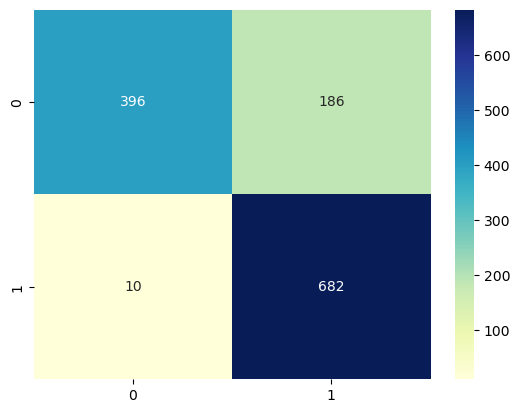

In [100]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
# sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='YlGnBu', categories = ['Actual Positive' : '1', 'Actual Negative' : '0'])
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Representing the ROC curve based on the accuracy

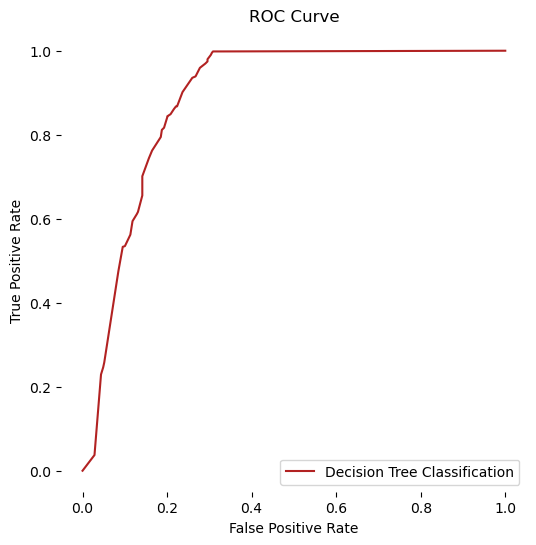

In [118]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Plot AUC/ROC curve
y_pred_proba = clf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

### Decision Tree graph

[Text(0.4, 0.9, 'x[8] <= -0.435\nentropy = 0.991\nsamples = 5093\nvalue = [2260, 2833]'),
 Text(0.2, 0.7, 'x[2] <= -0.769\nentropy = 0.014\nsamples = 1530\nvalue = [1528, 2]'),
 Text(0.15, 0.5, 'x[4] <= -0.6\nentropy = 0.047\nsamples = 387\nvalue = [385, 2]'),
 Text(0.1, 0.3, 'x[0] <= -0.491\nentropy = 0.08\nsamples = 202\nvalue = [200, 2]'),
 Text(0.05, 0.1, 'entropy = 0.191\nsamples = 34\nvalue = [33, 1]'),
 Text(0.15, 0.1, 'entropy = 0.053\nsamples = 168\nvalue = [167, 1]'),
 Text(0.2, 0.3, 'entropy = 0.0\nsamples = 185\nvalue = [185, 0]'),
 Text(0.25, 0.5, 'entropy = 0.0\nsamples = 1143\nvalue = [1143, 0]'),
 Text(0.6, 0.7, 'x[7] <= 0.263\nentropy = 0.733\nsamples = 3563\nvalue = [732, 2831]'),
 Text(0.4, 0.5, 'x[6] <= -0.299\nentropy = 0.614\nsamples = 3025\nvalue = [459, 2566]'),
 Text(0.3, 0.3, 'x[1] <= 1.071\nentropy = 0.508\nsamples = 1971\nvalue = [222, 1749]'),
 Text(0.25, 0.1, 'entropy = 0.481\nsamples = 1742\nvalue = [181, 1561]'),
 Text(0.35, 0.1, 'entropy = 0.678\nsample

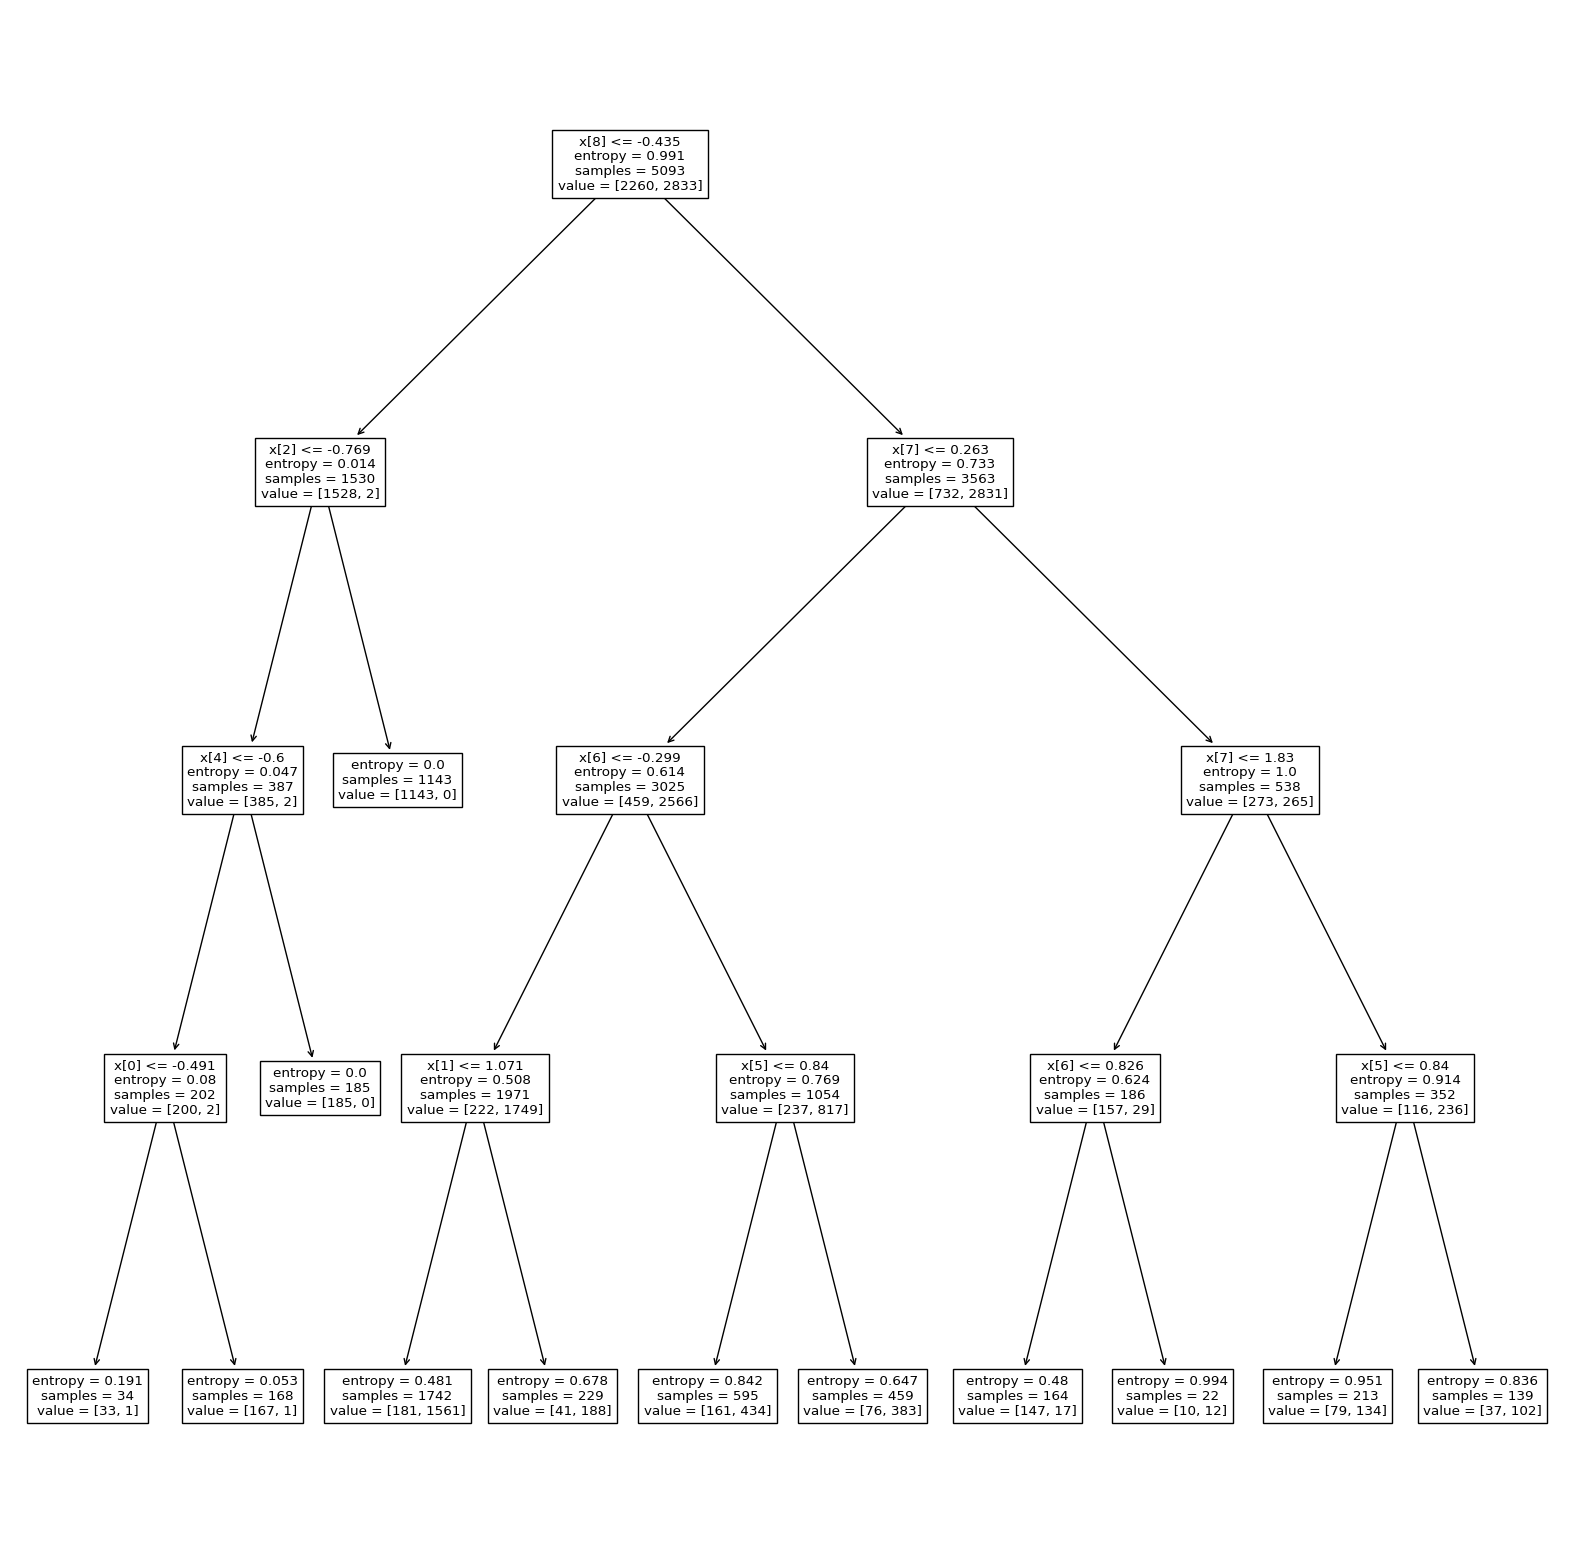

In [220]:
from sklearn import tree
plt.figure(figsize=(20, 20))
tree.plot_tree(clf)

### Residual Plot for Visualization

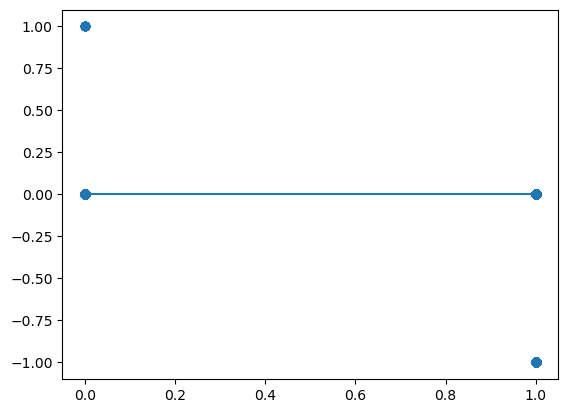

In [119]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max())
plt.show()

### Boxplot

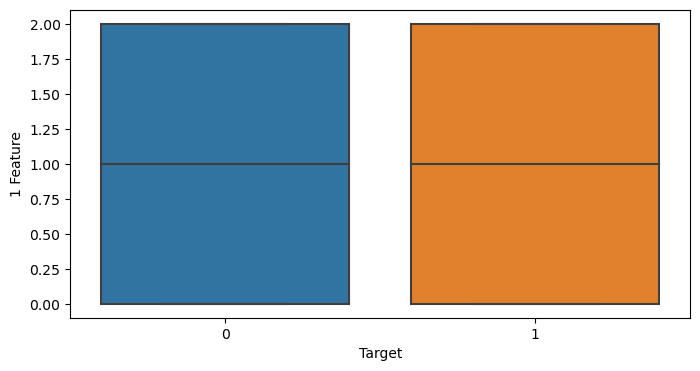

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x=data['outcome'], y=data['smstat'])
plt.xlabel('Target')
plt.ylabel('1 Feature')
plt.show()

### Pairplot

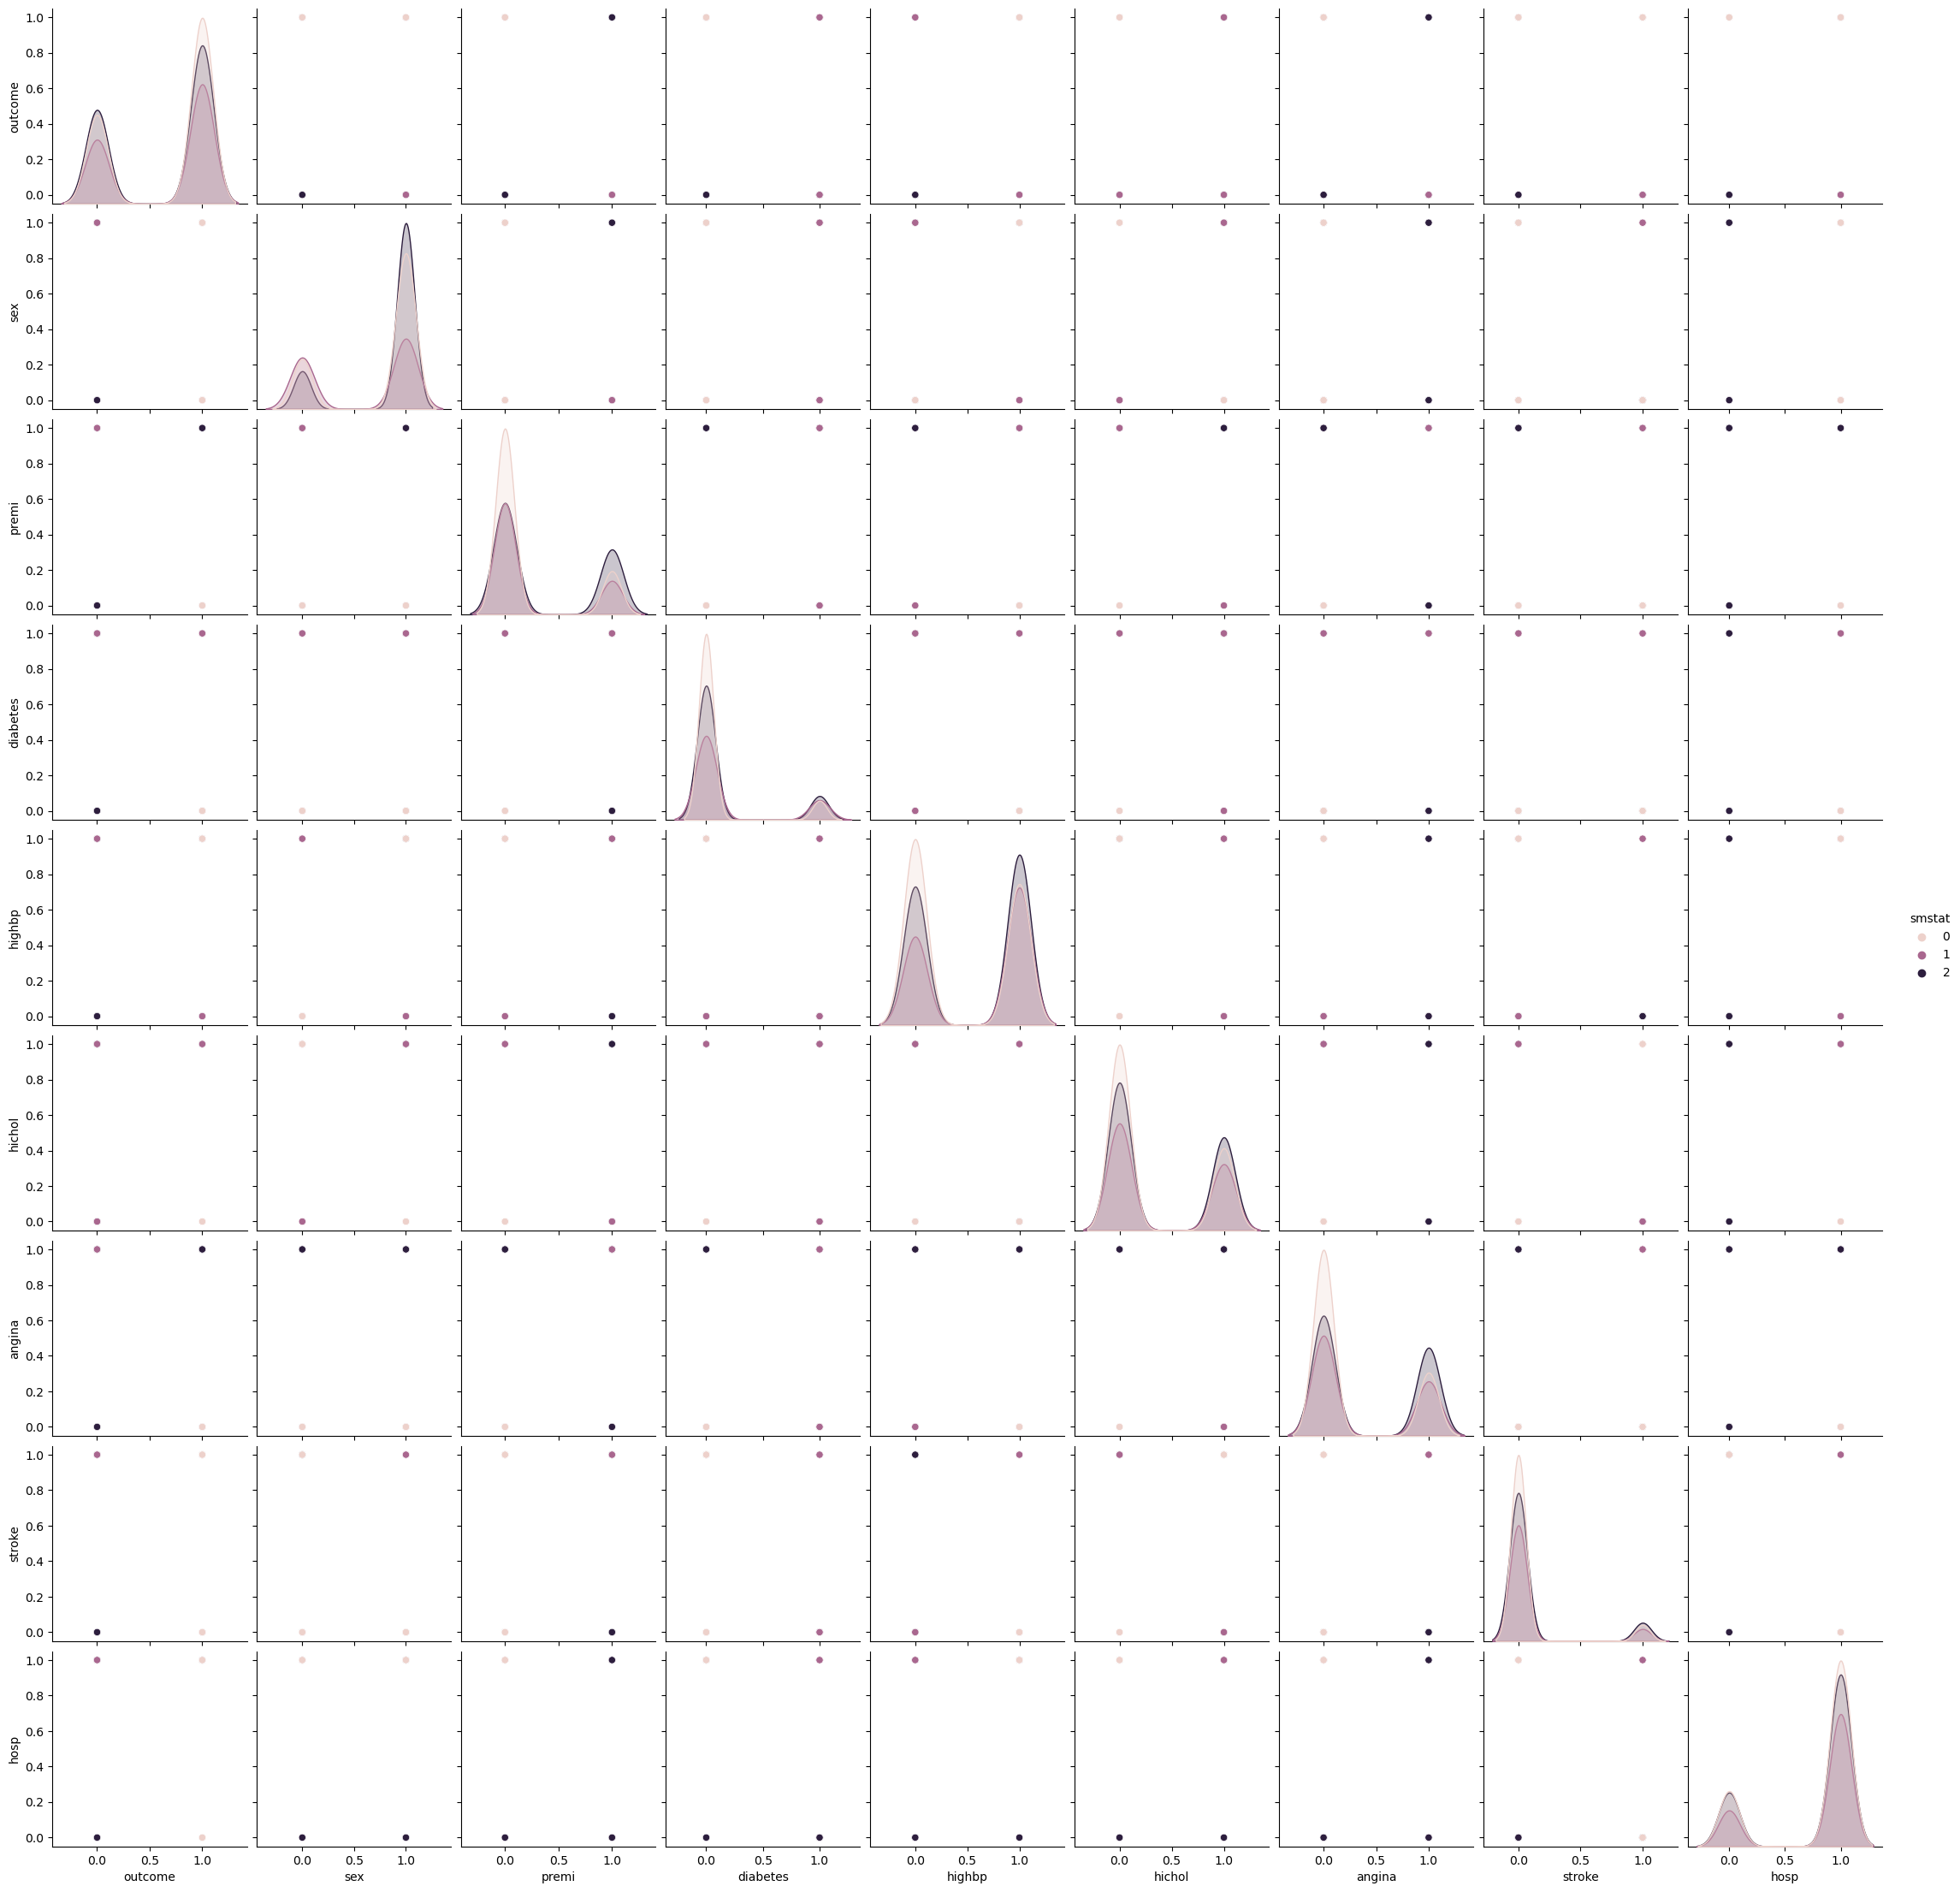

In [140]:
import seaborn
import matplotlib.pyplot as plt
 
seaborn.pairplot(data, hue ='smstat')

plt.show()

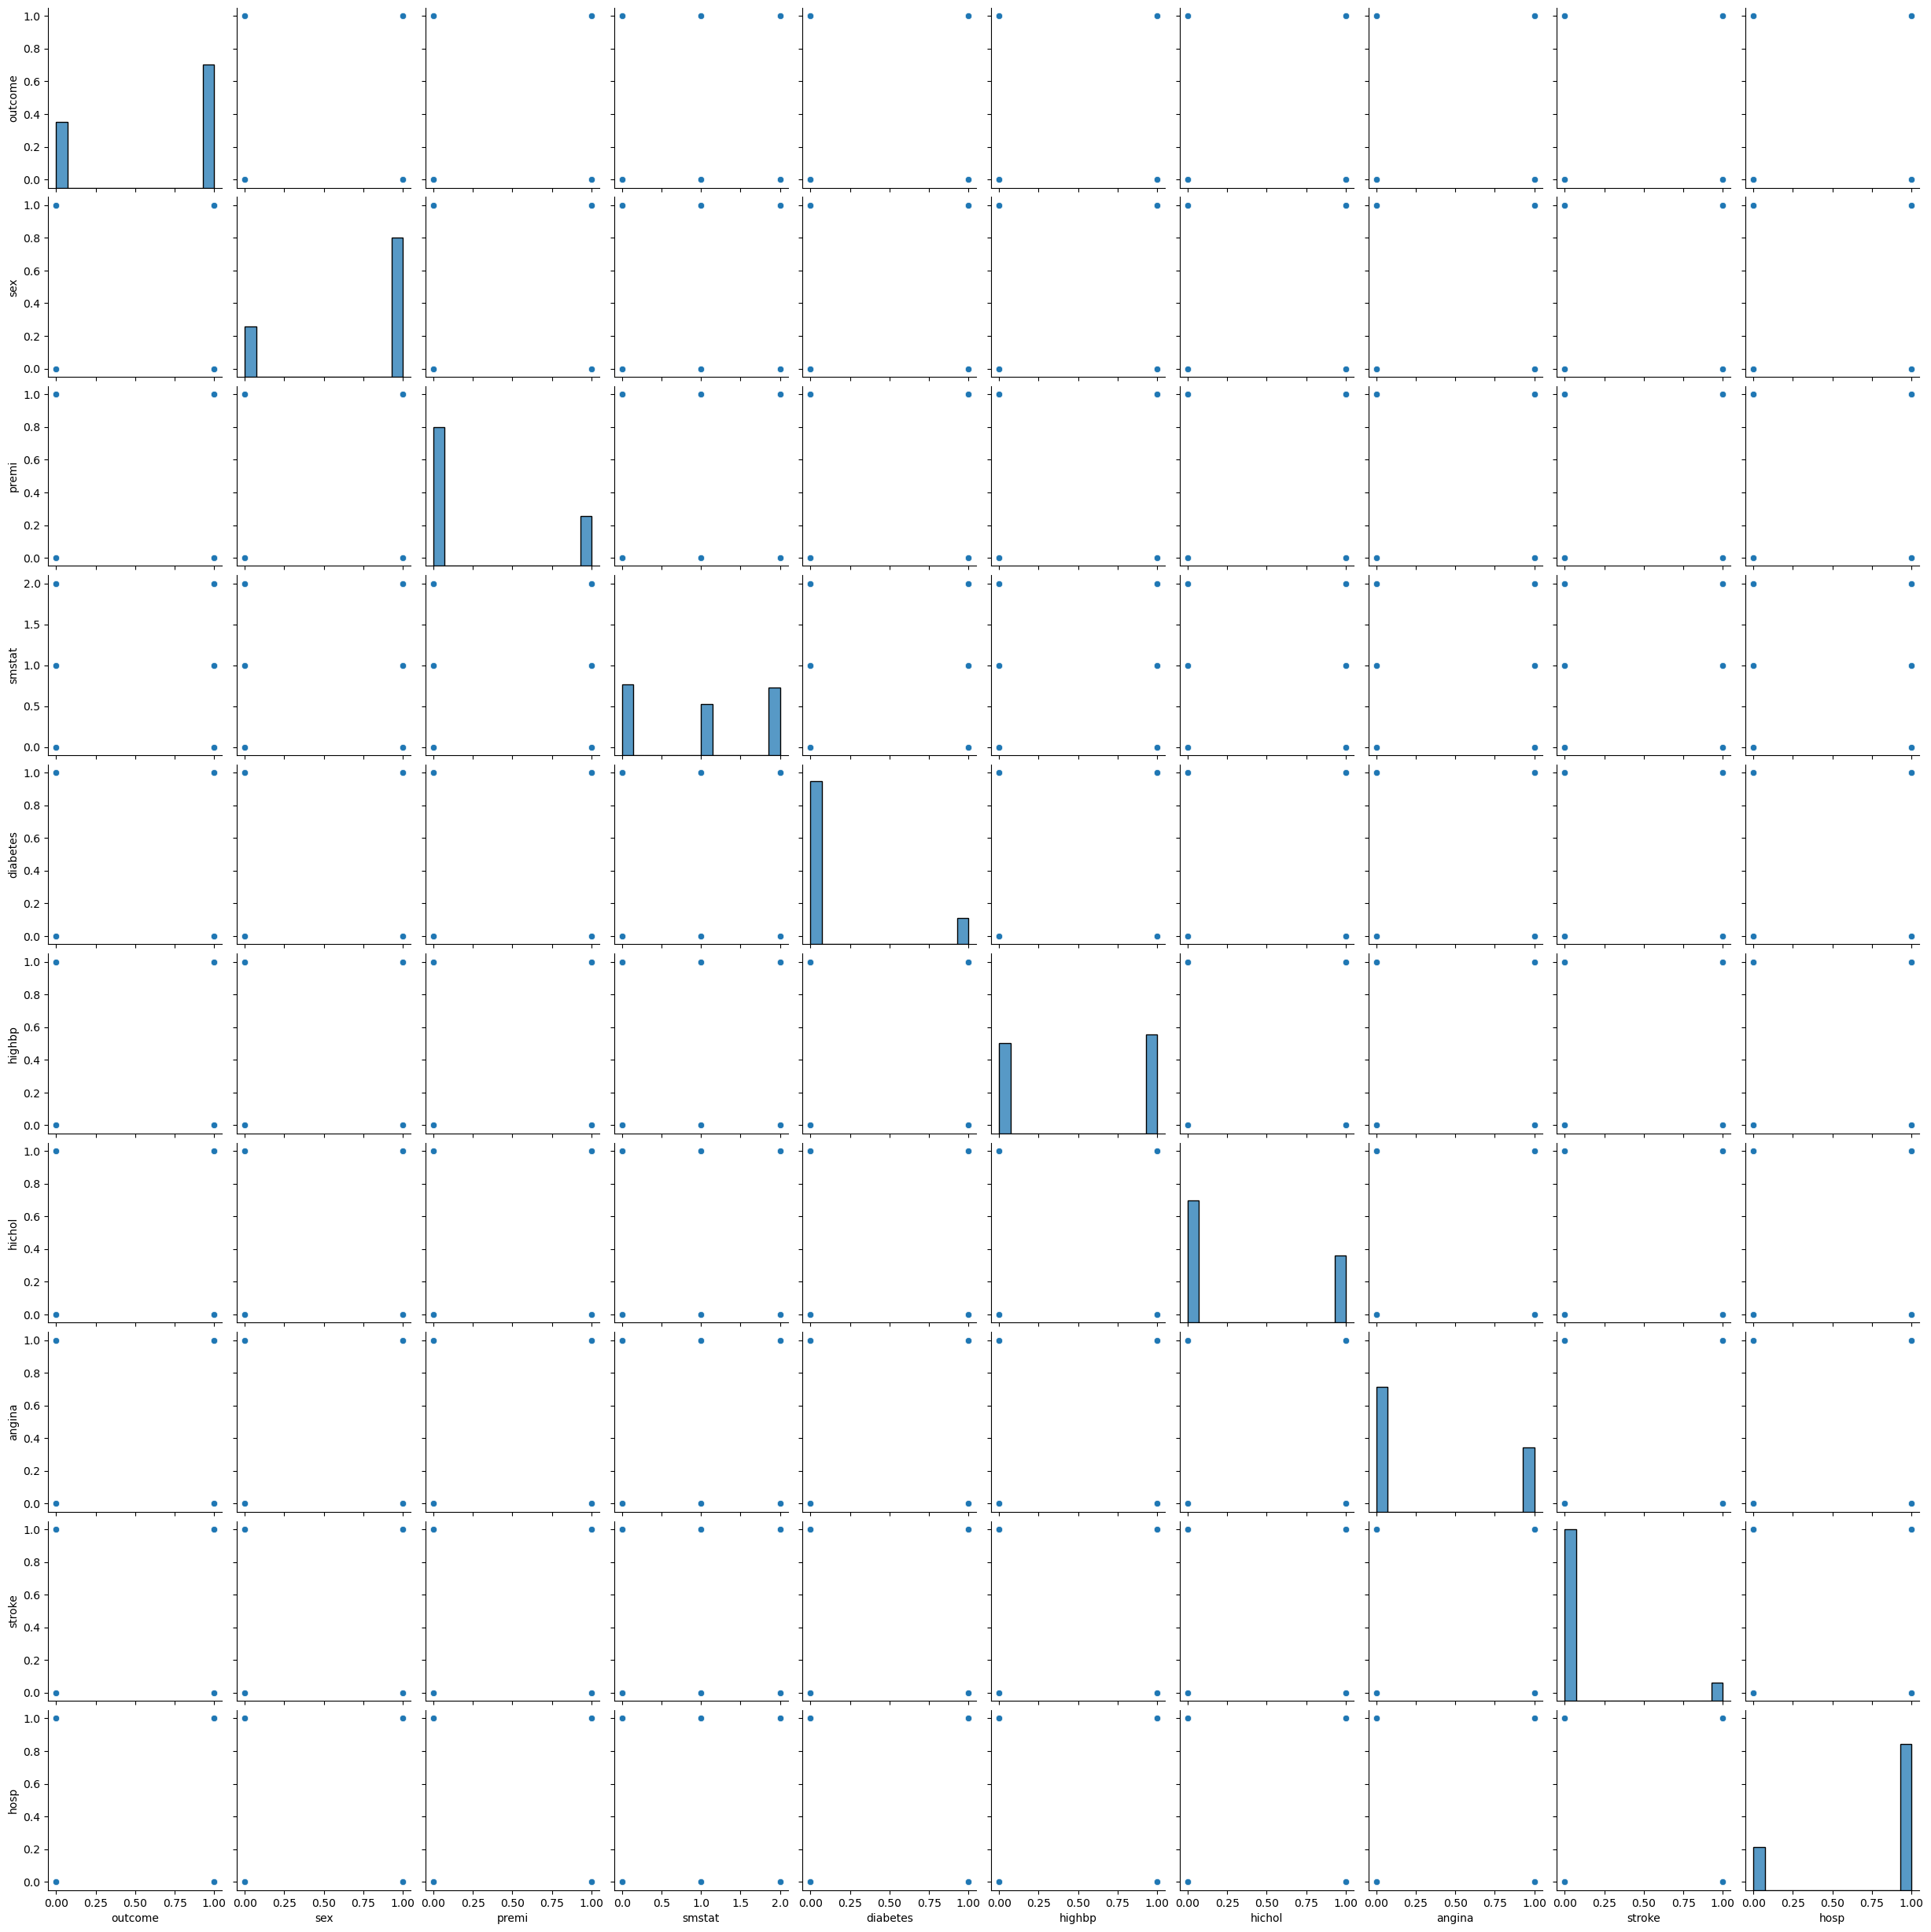

In [141]:
seaborn.pairplot(data)
plt.show()

### Inference

The dataset is used for Decision Tree Classification model. The dataset is not used as a whole and only specific features are interlinked to the target values. Since no empty or null values are present in the dataset it is the most suited dataset for the classification. Based on 80:20 validating split, feature scaling is applied to normalize the calculations as some feature values are too small as compared to others. Accuracy is deemed to be nearly 87 %, precision varying between 96 % for value 0 and 82 % for value 1, similarly for recall and F1-score. But there is no case of overfitting.